<h1>Student Perfomance - Análise de exploração de dados </h1>

A seguinte analise e baseada em um conjunto de dados de notas obtidas pelos alunos em várias disciplinas de nivel high school nos EUA. O conjunto de dados contém as seguintes variáveis:

<p>gender: genero 
<p>race/ethnicity: raca ou etinia
<p>parental level of education: grau escolar dos pais
<p>lunch: tipo de almoco
<p>test preparation: preparacao para prova
<p>math score: nota de matematica 
<p>reading score: nota de leitura
<p>writing score: nota de escrita

A analise provem responder alguns questionamentos:

<li>Pais com maior escolaridade possuem filhos com melhor desempenho?
<li>Estudantes que se preparam possuem notas melhores?
<li>Genero e grupo racial influencia nas notas?


In [2]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [6]:
students_df = pd.read_csv('StudentsPerformance.csv')

Verificacao inicial dos dados

In [7]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
students_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
students_df.duplicated().sum()

0

Verificando o comportando das variaveis e sua tendencia para determiados grupos

In [19]:
students_df['gender'].value_counts(normalize=True) *100

female    51.8
male      48.2
Name: gender, dtype: float64

In [21]:
students_df['race/ethnicity'].value_counts(normalize=True) *100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [23]:
students_df['parental level of education'].value_counts(normalize=True) *100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [24]:
students_df['test preparation course'].value_counts(normalize=True) *100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

Plots graficos para descrever melhor o comportamento numerico das variaveis e os alvos

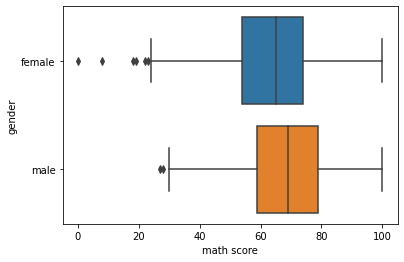

In [29]:
sns.boxplot(data=students_df, x='math score', y='gender')

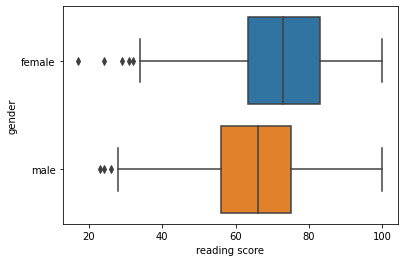

In [31]:
sns.boxplot(data=students_df, x='reading score', y='gender')

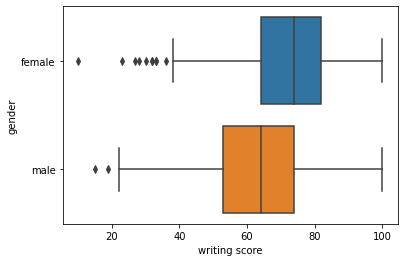

In [32]:
sns.boxplot(data=students_df, x='writing score', y='gender')

In [39]:
students_df.groupby(by ='gender').describe()['math score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


Plot para identifica corelacoes e grupos que tem ingluencia nas notas

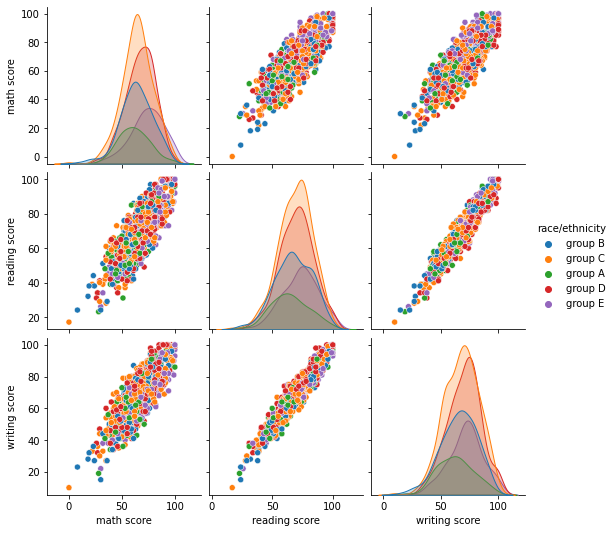

In [41]:
sns.pairplot(students_df, hue='race/ethnicity')

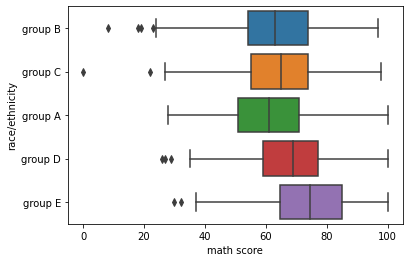

In [42]:
sns.boxplot(data=students_df, x='math score', y='race/ethnicity')

Nivel escolar dos pais e influencia nas notas de matematica

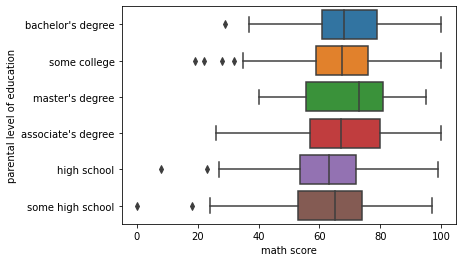

In [43]:
sns.boxplot(data=students_df, x='math score', y='parental level of education')

In [48]:
students_df.groupby('parental level of education').describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


Preparacao para o teste e influencia nas notas de matematica

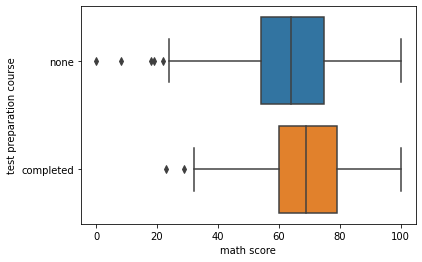

In [49]:
sns.boxplot(data=students_df, x='math score', y='test preparation course')

In [53]:
students_df.groupby('test preparation course').describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


Relacao entre as notas de matematica e escrita, a influencia do genero nos resultados

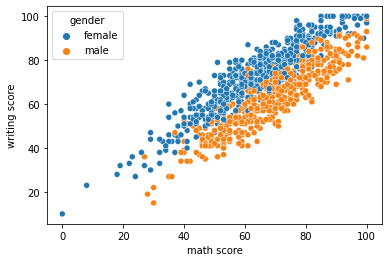

In [59]:
sns.scatterplot(data = students_df, x='math score', y='writing score', hue='gender')

Nota-se atraves da analise dos dados que ha algumas tendencias para que o desempenho dos alunos sejam melhores nas avaliacoes. Como nota-se que em matematica, homens tem desempenho melhor que mulheres, enquanto na prova escrita mulheres tem desempenho melhor. Alem disso, fatores que tambem contribuem para melhor nota sao filhos de pais que possuem maior grau escolar e tambem aqueles que se preparam para realizar as avaliacoes. Por fim, dada a distribuicao dos grupos, percebe-se que o grupo E apresenta desempenho melhor que os demais.